<a href="https://colab.research.google.com/github/sundarbee/PythonWorkout/blob/main/Decision_Tree.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [81]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression,LogisticRegression
from sklearn.tree import DecisionTreeRegressor,DecisionTreeClassifier
from sklearn.metrics import mean_squared_error,classification_report,confusion_matrix,f1_score
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [82]:
data = pd.read_csv("Automobile_data.csv")
data.replace("?",np.nan, inplace = True)
string_col = data.select_dtypes(exclude = np.number)
num_col = data.select_dtypes(include = np.number)

In [83]:
data.dtypes

,0
symboling,int64
normalized-losses,object
make,object
fuel-type,object
aspiration,object
num-of-doors,object
body-style,object
drive-wheels,object
engine-location,object
wheel-base,float64


In [84]:
for i in num_col:
  data[i] = pd.to_numeric(data[i],errors='raise')
  data[i] = data[i].fillna(data[i].mean())

In [85]:
for i in string_col:
  print(i)
  data[i] = data[i].astype('category').cat.as_unordered()
  data[i] = data[i].fillna(data[i].mode()[0])

normalized-losses
make
fuel-type
aspiration
num-of-doors
body-style
drive-wheels
engine-location
engine-type
num-of-cylinders
fuel-system
bore
stroke
horsepower
peak-rpm
price


In [86]:
data.dtypes

,0
symboling,int64
normalized-losses,category
make,category
fuel-type,category
aspiration,category
num-of-doors,category
body-style,category
drive-wheels,category
engine-location,category
wheel-base,float64


In [87]:
data

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,161,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495
1,3,161,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
2,1,161,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.4,10.0,102,5500,24,30,13950
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.4,8.0,115,5500,18,22,17450
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,-1,95,volvo,gas,std,four,sedan,rwd,front,109.1,...,141,mpfi,3.78,3.15,9.5,114,5400,23,28,16845
201,-1,95,volvo,gas,turbo,four,sedan,rwd,front,109.1,...,141,mpfi,3.78,3.15,8.7,160,5300,19,25,19045
202,-1,95,volvo,gas,std,four,sedan,rwd,front,109.1,...,173,mpfi,3.58,2.87,8.8,134,5500,18,23,21485
203,-1,95,volvo,diesel,turbo,four,sedan,rwd,front,109.1,...,145,idi,3.01,3.4,23.0,106,4800,26,27,22470


In [88]:
for i in data:
  if(str(data[i].dtype)=='category'):
    data[i] = data[i].cat.codes

In [89]:
X = data.drop('symboling',axis = 1)
y = data['symboling']

In [90]:
x_train, x_val, y_train, y_val = train_test_split(X,y,test_size = 0.2)

/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no pre

              precision    recall  f1-score   support

          -1       1.00      0.40      0.57         5
           0       0.75      0.86      0.80        14
           1       0.44      1.00      0.61         7
           2       0.00      0.00      0.00        12
           3       0.29      0.67      0.40         3

    accuracy                           0.56        41
   macro avg       0.49      0.58      0.48        41
weighted avg       0.47      0.56      0.48        41

The F1Score using LR 0.4760248447204969


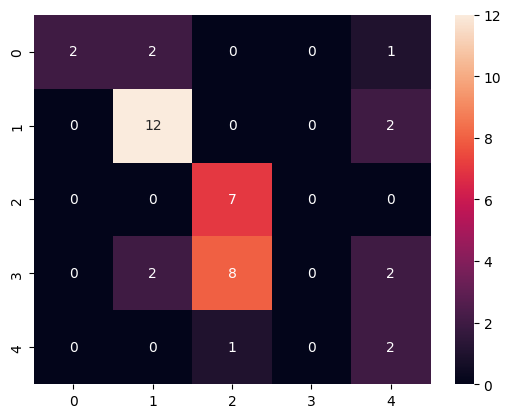

In [91]:
lr = LogisticRegression()
lr.fit(x_train,y_train)
y_pred = lr.predict(x_val)
print(classification_report(y_val,y_pred))
sns.heatmap(confusion_matrix(y_val,y_pred), annot = True)
print("The F1Score using LR", f1_score(y_val,y_pred,average= 'macro'))

              precision    recall  f1-score   support

          -1       1.00      0.80      0.89         5
           0       0.88      1.00      0.93        14
           1       0.70      1.00      0.82         7
           2       1.00      0.50      0.67        12
           3       0.60      1.00      0.75         3

    accuracy                           0.83        41
   macro avg       0.83      0.86      0.81        41
weighted avg       0.88      0.83      0.82        41

The F1Score using LR 0.8124836601307189


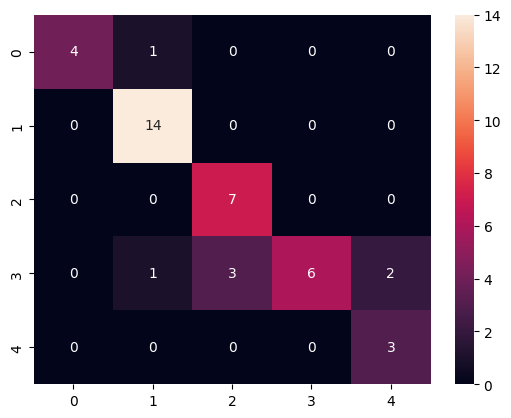

In [92]:
dt = DecisionTreeClassifier()
dt.fit(x_train,y_train)
y_pred = dt.predict(x_val)
print(classification_report(y_val,y_pred))
sns.heatmap(confusion_matrix(y_val,y_pred), annot = True)
print("The F1Score using LR", f1_score(y_val,y_pred,average= 'macro'))

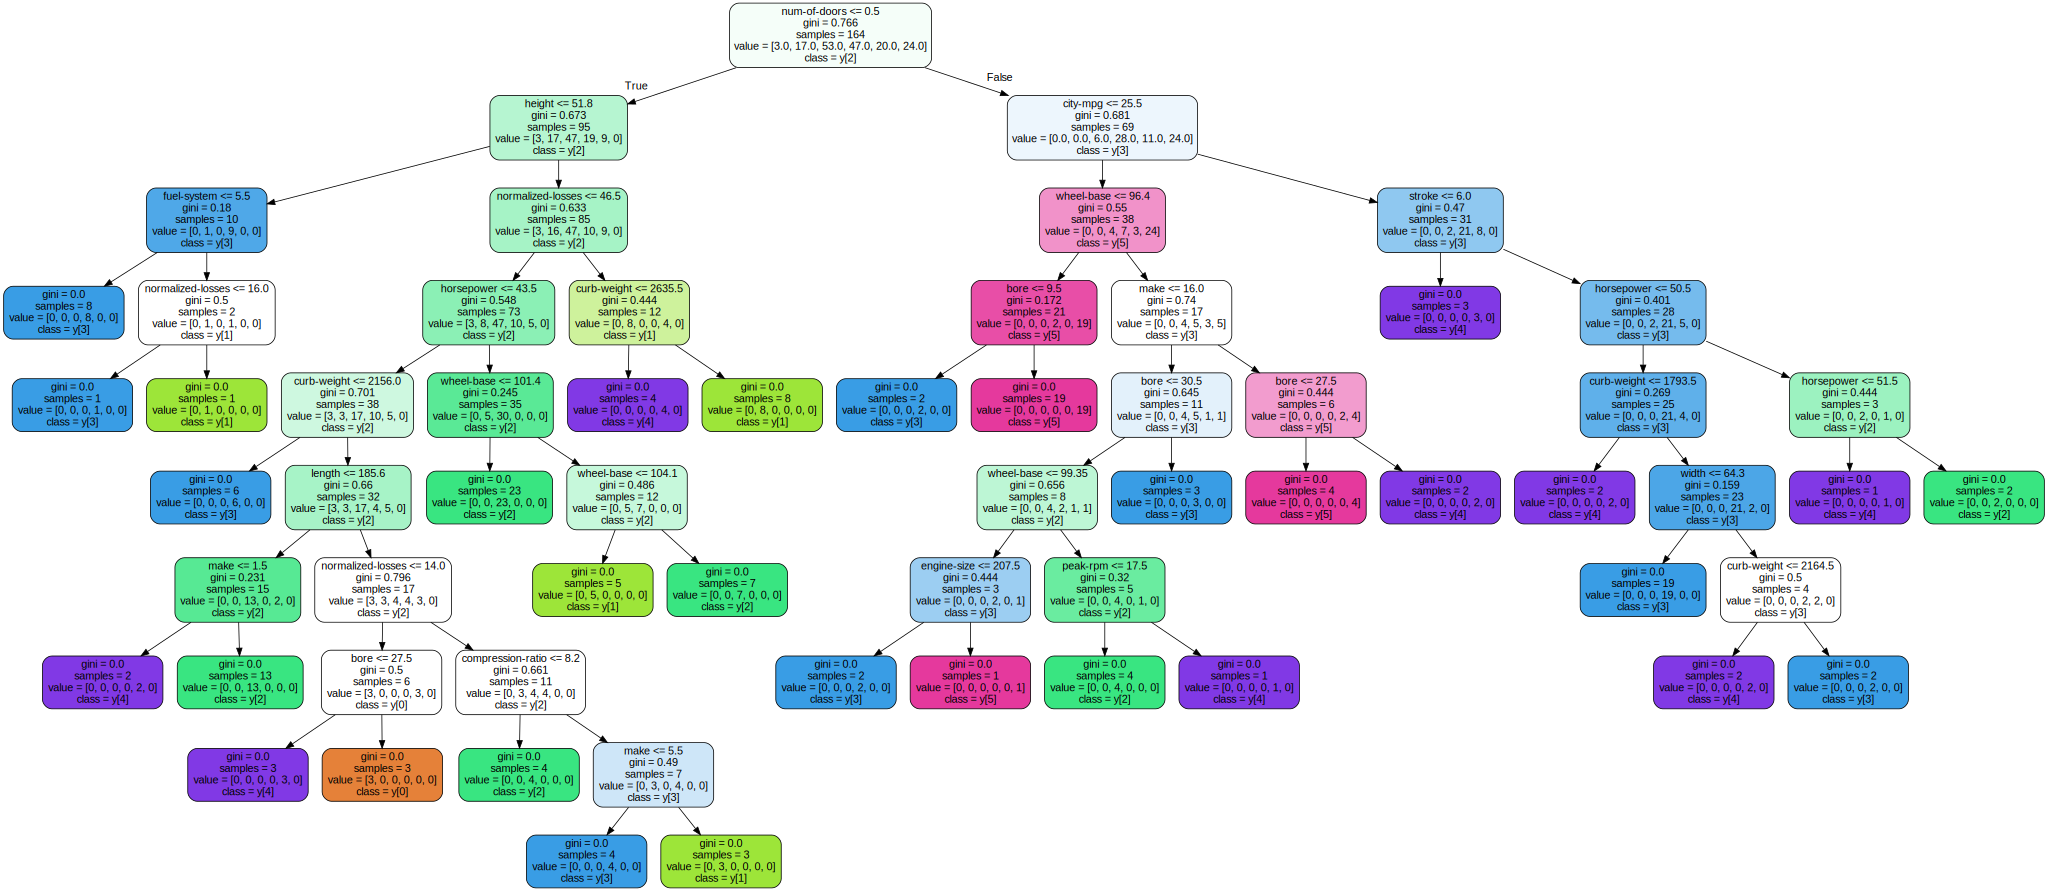

In [94]:
from sklearn.tree import export_graphviz
import graphviz

dot = export_graphviz(dt, out_file = None, feature_names = X.columns, class_names =True, filled = True, rounded = True)
graph = graphviz.Source(dot)
graph.render('dt', format = 'png')
graph